### Data Description of Abalone Datasets

The Abalone is a see animal which is usually as a dish in many foeign countries,In this case we have to find the age of abalone by counting 
the numbers of rings ,larger the number of rings more is the age of abalone, and the age is determined by the various factors given in the datset

## Importing libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('abalone_dataset.csv')

In [57]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [58]:
df.shape

(4177, 9)

In [59]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [60]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [61]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


as there is a remarkable difference between standard deviation and mean it means skewness is present

and as the difference between the 75% and max is  high it means outliers are present

and as per the observation the values seems to be on a single scale so no need of scaling 
but only column sex needs to be label encoded

###  Checking Outleirs and removing outliers

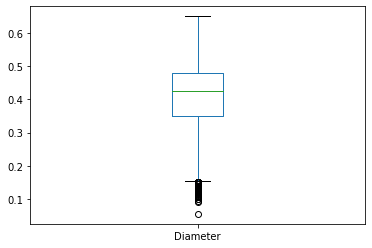

In [62]:
df['Diameter'].plot.box()

####  One Hot ENCODING 

In [63]:
# applying One hot encoding to convert 'M' and 'f ' as 0 and 1
df['Sex']=pd.get_dummies(df['Sex'])

### plotting Outliers

In [64]:
collist=df.columns.values

In [65]:
nrows=20
ncols=20

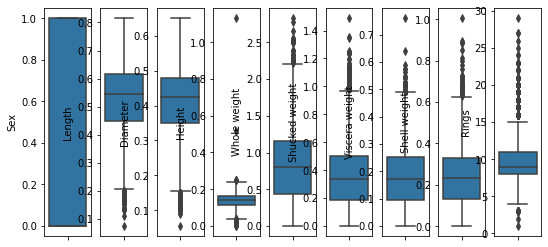

In [66]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],orient='v')

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [68]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [69]:
df_new.shape

(4027, 9)

In [70]:
4177-4027

150

In [73]:
df=df_new
df.shape

(4027, 9)

150 outliers are removed

##  Checking Correlation

In [74]:
dfcor=df.corr()

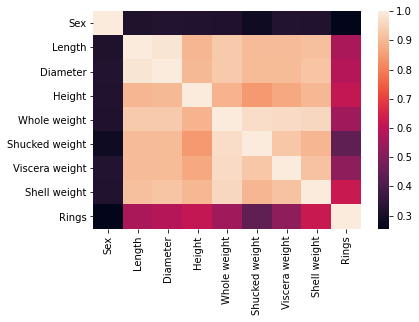

In [75]:
sns.heatmap(dfcor)

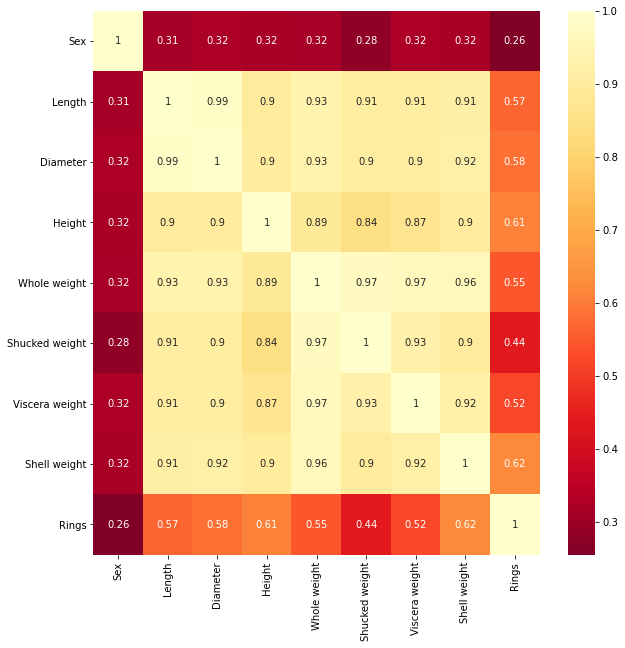

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

### Observations
Length and Diameter are highly correlated

shuchked weight and  whole weight are higly correlated

Rings are less correlated with Shucked weight




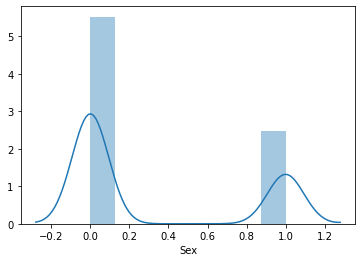

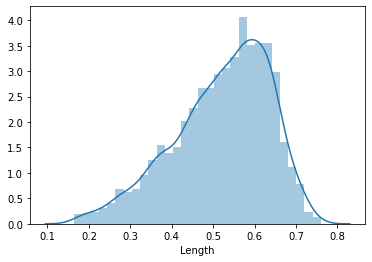

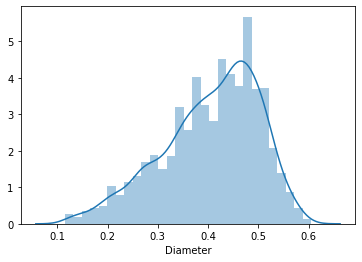

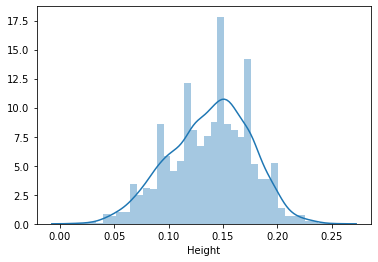

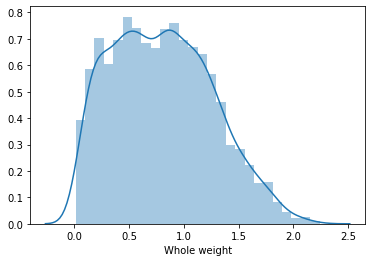

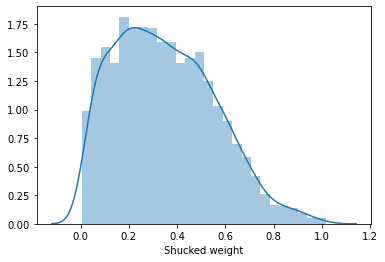

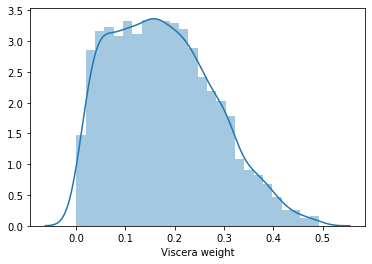

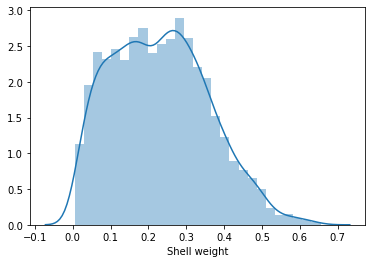

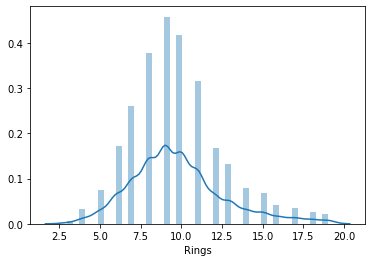

In [77]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [78]:
df.skew()

Sex               0.821149
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

skewness is not present present 

###  separating Independent Variables and Target Variable

In [79]:
x=df.iloc[:,:-1]

In [80]:
x.head()
x.shape

(4027, 8)

In [81]:
y=df.iloc[:,-1]

In [82]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

### Finding the best Random State

In [83]:
from sklearn.linear_model import LogisticRegression
maxaccuracy=0
maxrandomstate=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        maxrandomstate =i
print("max accuracy score is ",maxaccuracy,"at the random state of ",maxrandomstate)

max accuracy score is  0.3047404063205418 at the random state of  884


as you see the max accuracy_score is 30at random state of 884

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=884)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.3047404063205418
[[ 0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 12  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 17 27  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13 42 32  9  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 16 61 42 11  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 29 64 46  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 12 41 59 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  8 23 53 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 14 21  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 17 24  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  6  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  5 11  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  4  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  3  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=884)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.19751693002257337
[[ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  1  4  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6  2  3  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  9 15 15  9  2  0  2  0  0  1  0  1  0  0  0]
 [ 0  0  3 20 28 27 10  4  5  1  0  0  0  0  0  0  0]
 [ 0  0  5  7 27 28 38 15  8  5  0  2  1  0  0  1  1]
 [ 0  0  0  5  8 34 31 28 21 11  4  1  5  1  2  0  0]
 [ 0  0  1  3  6 15 30 26 22 12  4  2  2  3  3  1  1]
 [ 0  0  0  3  1  4 25 22 22 11  7  4  5  2  1  1  1]
 [ 0  0  0  0  2  4  8 10 11  5  4  1  1  1  1  0  0]
 [ 0  0  0  0  0  1  8  9 12  6  7  4  3  2  0  2  1]
 [ 0  0  0  0  0  0  2  2  3  1  1  1  0  2  0  0  0]
 [ 0  0  0  0  2  2  1  2  5  1  4  3  1  0  4  0  0]
 [ 0  0  0  0  0  0  2  0  0  2  1  1  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  0  2  3  2  1  1  0  0]
 [ 0  0  0  0  0  0  0  2  0  1  0  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  1  0  2  0  1  0  2  1  0  0  0]]
              precision    recall  f1-score   support

      

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=884)
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.3013544018058691
[[ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  6  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8 18 21  6  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 18 37 28  7  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 17 63 40  9  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 34 61 42  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  4 16 47 50 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 11 26 42 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 17 17  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 24 17  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  6  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  7  8  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  5  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  3  2  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=884)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.28103837471783294
[[ 0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6  5  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12 17 16  8  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 18 37 27  8  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  8 18 51 38 15  3  1  1  1  0  0  0  0  0]
 [ 0  0  0  3  6 33 46 41 16  2  1  1  1  0  0  1  0]
 [ 0  0  0  0  3 13 41 46 21  2  2  1  0  1  1  0  0]
 [ 0  0  1  0  3  3 19 35 32  8  6  0  0  2  0  0  0]
 [ 0  0  0  0  2  5 10 12  9  4  2  3  0  0  0  0  1]
 [ 0  0  0  0  2  3  8 18 11  4  5  1  1  1  1  0  0]
 [ 0  0  0  0  0  0  3  1  3  0  0  2  1  0  2  0  0]
 [ 0  0  0  0  0  2  4  6  6  0  4  2  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  2  0  1  1  1  0  0  1  1  0]
 [ 0  0  0  0  0  0  1  1  2  1  4  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  1  3  0  1  0  0  0  0]]
              precision    recall  f1-score   support

      

now its time for Cross Validation score

In [98]:
csr=cross_val_score(lg,x,y,cv=10)
print("Cross_Validation_Score of Logistic Regression is ",csr.mean())
print("\n\n")
csr=cross_val_score(dtc,x,y,cv=10)
print("Cross_Validation_Score of DecisionTreeClassifier is ",csr.mean())
print("\n\n")
csr=cross_val_score(rfc,x,y,cv=10)
print("Cross_Validation_Score of RandomForestClassifier is ",csr.mean())
print("\n\n")
csr=cross_val_score(svc,x,y,cv=10)
print("Cross_Validation_Score of Support Vector Class is ",csr.mean())
print("\n\n")

Cross_Validation_Score of Logistic Regression is  0.26397602557929956



Cross_Validation_Score of DecisionTreeClassifier is  0.1954384405515845



Cross_Validation_Score of RandomForestClassifier is  0.25330234682666075



Cross_Validation_Score of Support Vector Class is  0.2686906657778107





In [ ]:
'''


MODEL               ACCURACY                  CROSS_VAL_SCORE              DIFFERENCE

LogisticR                30.47                         26                       4  
DecisionTC               19.75                         19.54                       0
SVC                      30.13                         26                       4
RandomFC                 28                           25                       3


'''

as the difference in DecisionTreeClassifier is 0 it learned best but its better to go with RandomFC bcoz its accuracy is more and not a big difference is there

### HpyerParameterTuning

In [102]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameter={ 
                'n_estimators':[50,100,150,200,250,300,350]
                

}

In [110]:
cgv=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [111]:
cgv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350]})

In [112]:
cgv.estimator.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [113]:
cgv.best_params_

{'n_estimators': 200}

In [114]:
cgv_pred=cgv.best_estimator_.predict(x_test)

In [115]:
accuracy_score(y_test,cgv_pred)

0.28442437923250563

In [116]:
import joblib
joblib.dump(cgv.best_estimator_,'abalone_svc.obj')

['abalone_svc.obj']